dataset link: https://www.kaggle.com/datasets/gpiosenka/100-bird-species 
run the project in the kaggle        

In [1]:

import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

import cv2

In [6]:
data=pd.read_csv(r"C:\Users\nagireddy\Downloads\archive\birds.csv")

In [7]:
data.head()

,class id,filepaths,labels,data set,scientific name
0,0.0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
1,0.0,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
2,0.0,train/ABBOTTS BABBLER/008.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
3,0.0,train/ABBOTTS BABBLER/009.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
4,0.0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI


In [8]:


# Assuming your CSV file has a column named 'class' which contains the class labels for each image
class_counts = data['labels'].value_counts()

# Display count of images in each class
print("Number of images in each class:")
print(class_counts)


Number of images in each class:
labels
RUFOUS TREPE               273
HOUSE FINCH                258
D-ARNAUDS BARBET           243
OVENBIRD                   243
ASIAN GREEN BEE EATER      230
                          ... 
NORTHERN RED BISHOP        140
SNOWY PLOVER               140
PATAGONIAN SIERRA FINCH    140
EURASIAN GOLDEN ORIOLE     140
RED TAILED THRUSH          140
Name: count, Length: 525, dtype: int64


In [9]:
len(data)

89885

  data set  image_count
0     test         2625
1    train        84635
2    valid         2625


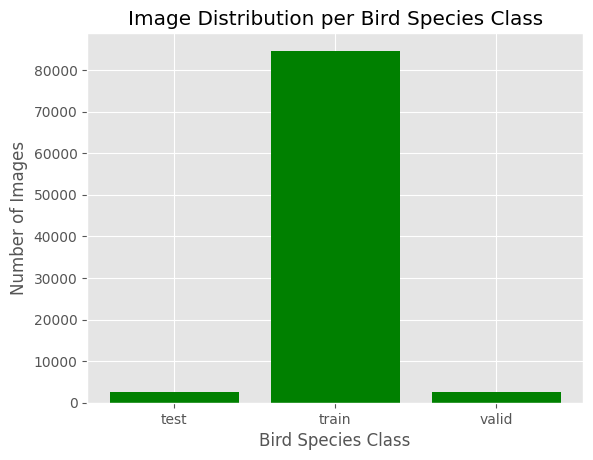

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by class and count images
class_counts = data.groupby('data set').size().reset_index(name='image_count')

# Display the counts
print(class_counts)

plt.bar(class_counts['data set'], class_counts['image_count'], color='green')
plt.xlabel('Bird Species Class')
plt.ylabel('Number of Images')
plt.title('Image Distribution per Bird Species Class')
plt.show()

In [20]:
TRAIN = r'C:\Users\nagireddy\Downloads\archive\train'
VALID = r'C:\Users\nagireddy\Downloads\archive\valid'
TEST = r'C:\Users\nagireddy\Downloads\archive\test'

In [12]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras as keras


import tensorflow_addons as tfa
import os

from tensorflow.keras import layers, optimizers, losses, metrics, callbacks, initializers
from tensorflow.keras import Sequential, Model, Input

from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\nagireddy\AppData\Roaming\Python\Python310\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [21]:
datagen= ImageDataGenerator(rescale=1./255)

train_generator=datagen.flow_from_directory(
    directory=TRAIN,
    batch_size=64,
    shuffle=True,
    class_mode="categorical",
    target_size=(224, 224))

valid_generator=datagen.flow_from_directory(
    directory=VALID,
    batch_size=64,
    shuffle=True,
    class_mode="categorical",
    target_size=(224, 224))

test_generator=datagen.flow_from_directory(
    directory=TEST,
    batch_size=64,
    shuffle=False,
    class_mode="categorical",
    target_size=(224, 224))

Found 63960 images belonging to 400 classes.
Found 2035 images belonging to 406 classes.
Found 2005 images belonging to 400 classes.


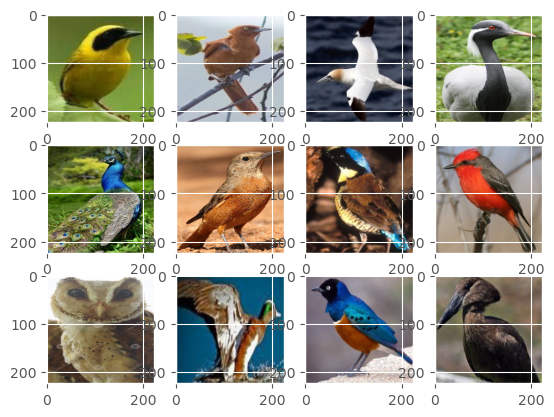

In [24]:
for data_batch, labels_batch in train_generator:
  for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(data_batch[i],cmap=plt.get_cmap('gray'))
    # show the figure
  break
plt.show()

In [23]:
from tensorflow.keras.applications.xception import Xception

base_model = Xception(include_top = False, input_shape = (224,224,3), weights = 'imagenet')

base_model.trainable = False

inputs = Input(shape=(224,224,3))
main = base_model(inputs, training = False)

x = layers.GlobalMaxPooling2D()(main)
x = layers.Dense(256, 'relu', kernel_initializer='he_normal')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(400, activation='softmax', name= 'outputs')(x)

model = Model(inputs= [inputs], outputs= [outputs])

reducer = callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    patience=1, 
    verbose=1, 
    factor=0.1)

model.compile(optimizer=optimizers.Adam(0.001), 
              metrics=[metrics.CategoricalAccuracy(name='accuracy'), tfa.metrics.F1Score(400), metrics.TopKCategoricalAccuracy(k=5)], 
              loss=losses.CategoricalCrossentropy(label_smoothing=0.1))

model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_max_pooling2d (Glob  (None, 2048)              0         
 alMaxPooling2D)                                                 
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 batch_normalization_4 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 256)               0   

In [5]:
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    callbacks= reducer,
                    epochs=10)

2022-03-30 02:42:47.133673: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-03-30 02:42:51.543316: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


913/913 [==============================] - 424s 454ms/step - loss: 2.5922 - accuracy: 0.6074 - f1_score: 0.6025 - top_k_categorical_accuracy: 0.8269 - val_loss: 1.7066 - val_accuracy: 0.8405 - val_f1_score: 0.8328 - val_top_k_categorical_accuracy: 0.9690
Epoch 2/10
913/913 [==============================] - 204s 223ms/step - loss: 1.8206 - accuracy: 0.8012 - f1_score: 0.7995 - top_k_categorical_accuracy: 0.9530 - val_loss: 1.6036 - val_accuracy: 0.8665 - val_f1_score: 0.8637 - val_top_k_categorical_accuracy: 0.9795
Epoch 3/10
913/913 [==============================] - 204s 223ms/step - loss: 1.7090 - accuracy: 0.8370 - f1_score: 0.8354 - top_k_categorical_accuracy: 0.9657 - val_loss: 1.5422 - val_accuracy: 0.8800 - val_f1_score: 0.8773 - val_top_k_categorical_accuracy: 0.9875
Epoch 4/10
913/913 [==============================] - 206s 225ms/step - loss: 1.6500 - accuracy: 0.8556 - f1_score: 0.8546 - top_k_categorical_accuracy: 0.9724 - val_loss: 1.5348 - val_accuracy: 0.8750 - val_f1_sc

In [ ]:
base_model = model.layers[1]
base_model.trainable = True

for  layer in base_model.layers[:-20]:
    layer.trainable = False

model.compile(optimizer = optimizers.Adam(0.0001), 
              metrics=[metrics.CategoricalAccuracy(name='accuracy'), tfa.metrics.F1Score(400), metrics.TopKCategoricalAccuracy(k=5)], 
              loss=losses.CategoricalCrossentropy(label_smoothing=0.1))

checkpoint = callbacks.ModelCheckpoint(
    filepath='birds_fine.h5',
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode = 'max')


In [7]:

history_fine = model.fit(train_generator,
                         epochs=20,
                         initial_epoch=history.epoch[-1],
                         validation_data=valid_generator,
                         callbacks= checkpoint)

Epoch 10/20
913/913 [==============================] - 220s 238ms/step - loss: 1.4055 - accuracy: 0.9313 - f1_score: 0.9312 - top_k_categorical_accuracy: 0.9911 - val_loss: 1.2769 - val_accuracy: 0.9545 - val_f1_score: 0.9537 - val_top_k_categorical_accuracy: 0.9960

Epoch 00010: val_accuracy improved from -inf to 0.95450, saving model to birds_fine.h5
Epoch 11/20
913/913 [==============================] - 219s 239ms/step - loss: 1.2929 - accuracy: 0.9649 - f1_score: 0.9648 - top_k_categorical_accuracy: 0.9970 - val_loss: 1.2510 - val_accuracy: 0.9650 - val_f1_score: 0.9647 - val_top_k_categorical_accuracy: 0.9960

Epoch 00011: val_accuracy improved from 0.95450 to 0.96500, saving model to birds_fine.h5
Epoch 12/20
913/913 [==============================] - 220s 240ms/step - loss: 1.2325 - accuracy: 0.9812 - f1_score: 0.9812 - top_k_categorical_accuracy: 0.9989 - val_loss: 1.2173 - val_accuracy: 0.9670 - val_f1_score: 0.9666 - val_top_k_categorical_accuracy: 0.9965

Epoch 00012: val_ac

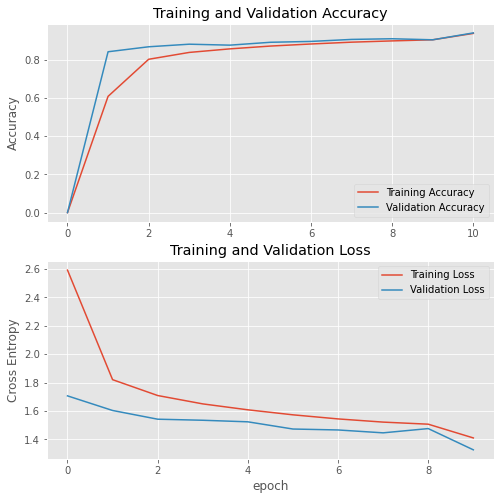

In [8]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [9]:
model.evaluate(test_generator)

32/32 [==============================] - 16s 504ms/step - loss: 1.0885 - accuracy: 0.9910 - f1_score: 0.9910 - top_k_categorical_accuracy: 0.9980


[1.0885026454925537,
 0.9909999966621399,
 array([1.        , 0.88888896, 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.88888896, 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.90909094, 0.88888896, 1.        ,
        0.88888896, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.8000001 , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.90909094, 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.90909094, 1.        , 1.        ,
        1.        , 1.        , 0.90909094, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
      